In [1]:
import EDEDE
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
from math import sqrt, pi, exp
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

Could not load cython functions. Some functionality might be broken.
Could not load sparse_dot_mkl. Will use scipy.sparse for matrix products.


In [2]:
n_per_group = 40
n_groups = 4
t_start = 0
t_end = 200
basis_num_communities = 2
powers_num_communities = [2, 1]
list_p_within_community = [45/50] * len(powers_num_communities)

inter_tau = 20
density = 20

In [3]:
net = EDEDE.generate_smooth_SBM(inter_tau = inter_tau, density = density,
                          n_per_group = n_per_group, n_groups = n_groups,
                          t_start = t_start, t_end = t_end,
                          basis_num_communities = basis_num_communities, powers_num_communities = powers_num_communities, list_p_within_community = list_p_within_community, seed=314)

PID  47310  :  merged  285  events
PID  47310  :  merged  0  events


In [4]:
net._compute_time_grid()

In [5]:
t_start_snapshot1 = 40
t_start_snapshot2 = 90
t_start_snapshot3= 140

t_end_snapshot1 = 60
t_end_snapshot2 = 110
t_end_snapshot3= 160


snapshot1 = net.compute_static_adjacency_matrix(start_time=t_start_snapshot1, end_time=t_end_snapshot1).toarray()
snapshot2 = net.compute_static_adjacency_matrix(start_time=t_start_snapshot2, end_time=t_end_snapshot2).toarray()
snapshot3 = net.compute_static_adjacency_matrix(start_time=t_start_snapshot3, end_time=t_end_snapshot3).toarray()

In [6]:
net.compute_laplacian_matrices(save_adjacencies=True, random_walk=False)
number_active_events = []
for i,t in enumerate(net.times[:-1]):
    number_active_events.append(np.sum(net.adjacencies[i].toarray()) / 2)

In [7]:
matrices_times= {'(a)':10, '(b)':75, '(c)':125, '(d)':250}
matrices = {}
for key, time in matrices_times.items():
    matrices[key] = net.compute_static_adjacency_matrix(start_time=time, end_time=time+5).toarray()

In [8]:
matrices_times= {'(a)':10, '(b)':75, '(c)':125, '(d)':205}
matrices = {}
for key, time in matrices_times.items():
    matrices[key] = net.compute_static_adjacency_matrix(start_time=time, end_time=time+5).toarray()

In [9]:
matrices_times= {'(a)':10, '(b)':75, '(c)':125, '(d)':225}
matrices = {}
for key, time in matrices_times.items():
    index_t_before = np.where(net.times <= time)[0][-1]
    matrices[key] = net.adjacencies[index_t_before].toarray()

In [10]:
all_mats = list(matrices.values()) + [snapshot1, snapshot2, snapshot3]
all_vals = np.concatenate([m.ravel() for m in all_mats])

# e.g. ignore the lowest 2% and highest 2%
vmin = np.percentile(all_vals, 2)
vmax = np.percentile(all_vals, 98)

norm = Normalize(vmin=vmin, vmax=vmax)
cmap = "plasma"

/var/folders/39/mrj9jtrn5fb2d2f71qw3dhy80000gn/T/ipykernel_47310/1785913476.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


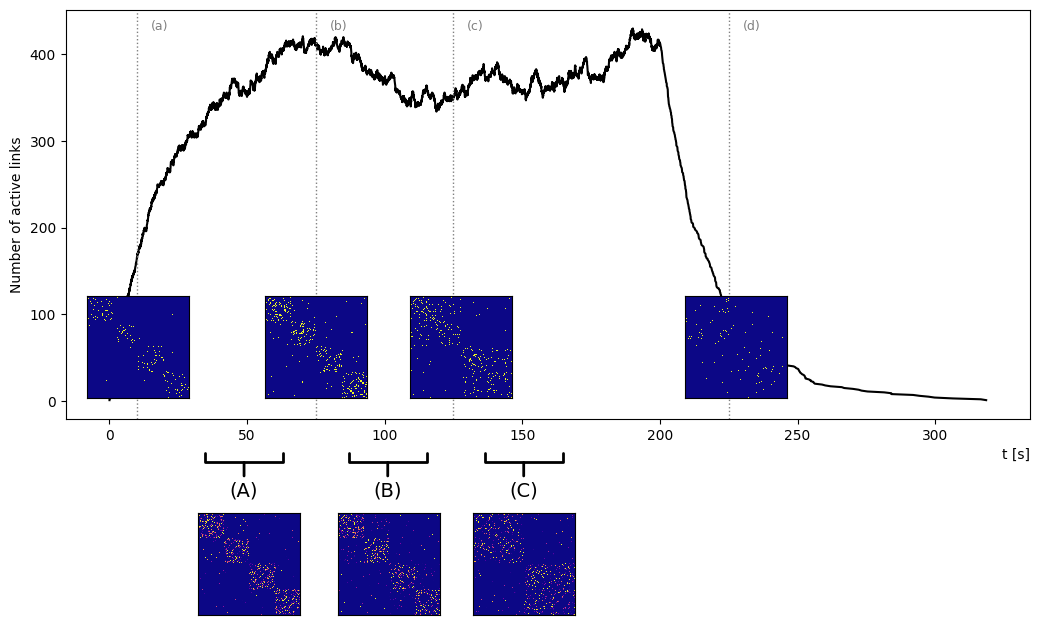

In [11]:
fig, ax = plt.subplots(figsize=(10.5, 5.2))

color = 'black'
ax.plot(net.times[:-1], number_active_events, color=color)

ax.set_xlabel("t [s]", loc="right")
ax.set_ylabel("Number of active links", color=color)
ax.tick_params(axis='y', labelcolor=color)


# Give some extra room at the bottom for insets and braces
fig.subplots_adjust(bottom=0.1)


# Adjacency ABOVE X-AXIS
insets = []
for key, matrix in matrices.items():
    insets.append(matrix)
positions = [-0.05, 0.135, 0.285, 0.57]
for i, (matrix, pos) in enumerate(zip(insets, positions)):
    inset_ax = inset_axes(
        ax,
        width="25%", height="25%",
        loc="upper left",
        bbox_to_anchor=(pos, -0.70, 1, 1),
        bbox_transform=ax.transAxes,
        borderpad=0
    )
    inset_ax.matshow(matrix, aspect='equal', cmap=cmap)#, norm=norm)
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])

# Visual cues
for key, time in matrices_times.items():
    ax.axvline(time, color="gray", linestyle=":", linewidth=1.0)
    ax.text(time+ 5, ax.get_ylim()[1]*0.95, key, color="gray", fontsize=9)

# SNAPSHOT MATRICES BELOW X-AXIS
insets = [snapshot1, snapshot2, snapshot3]
positions = [0.065, 0.210, 0.35]
for i, (matrix, pos) in enumerate(zip(insets, positions)):
    inset_ax = inset_axes(
        ax,
        width="25%", height="25%",
        loc="upper left",
        bbox_to_anchor=(pos, -1.23, 1, 1),
        bbox_transform=ax.transAxes,
        borderpad=0
    )
    inset_ax.matshow(matrix, aspect='equal', cmap=cmap) #,norm=norm)
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])

# Add brackets for (0,100) and (100,200)
# y and brace_height are in axes coordinates; x0, x1 in data coordinates
ax.annotate('(A)', xy=(0.185, -0.10), xytext=(0.185, -0.20),
    fontsize=14, ha='center', va='bottom', xycoords='axes fraction',
    arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=.5', lw=2.0))

ax.annotate('(B)', xy=(0.334, -0.10), xytext=(0.334, -0.20),
            fontsize=14, ha='center', va='bottom', xycoords='axes fraction', 
            arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=.5', lw=2.0))

ax.annotate('(C)', xy=(0.475, -0.10), xytext=(0.475, -0.20),
            fontsize=14, ha='center', va='bottom', xycoords='axes fraction', 
            arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=.5', lw=2.0))


plt.tight_layout()
# plt.savefig('/Users/samuelkoovely/Desktop/fig_EDEDE/fig_EDEDE_events.pdf', format='pdf',bbox_inches='tight',
#     pad_inches=0.05) # small padding around
plt.show()